--- Linear Regression Results (From Scratch) ---
Calculated Intercept (b0): 60.0000
Calculated Slope (b1): 5.0000
Regression Equation: y = 60.0000 + 5.0000 * x
---------------------------------------------


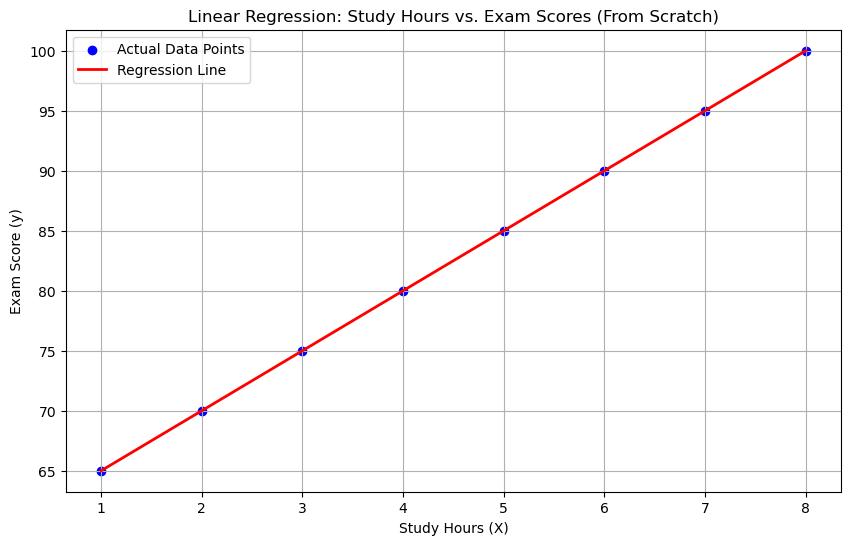

In [1]:
import math
import matplotlib.pyplot as plt

# --- 1. Data Definition ---
# Sample data: Relationship between study hours (X) and exam score (Y)
study_hours = [1, 2, 3, 4, 5, 6, 7, 8]
exam_scores = [65, 70, 75, 80, 85, 90, 95, 100]


# --- 2. Helper Functions for OLS Calculation ---

def mean(values):
    """Calculates the mean (average) of a list of numbers."""
    return sum(values) / float(len(values))

def variance(values, mean_val):
    """Calculates the variance of a list of numbers."""
    return sum([(x - mean_val)**2 for x in values])

def covariance(x_values, mean_x, y_values, mean_y):
    """Calculates the covariance between two lists of numbers."""
    covar = 0.0
    for i in range(len(x_values)):
        covar += (x_values[i] - mean_x) * (y_values[i] - mean_y)
    return covar


# --- 3. Core Regression Calculation Function ---

def calculate_coefficients(x_train, y_train):
    """
    Calculates the coefficients (intercept b0 and slope b1) for simple linear 
    regression using the Ordinary Least Squares (OLS) method.
    """
    mean_x = mean(x_train)
    mean_y = mean(y_train)

    covariance_xy = covariance(x_train, mean_x, y_train, mean_y)
    variance_x = variance(x_train, mean_x)

    b1_slope = covariance_xy / variance_x
    b0_intercept = mean_y - b1_slope * mean_x
    
    return b0_intercept, b1_slope

# --- 4. Prediction Function ---

def make_predictions(x_values, intercept, slope):
    """Generates predictions for a list of X values using the regression line."""
    predictions = []
    for x in x_values:
        y_pred = intercept + slope * x
        predictions.append(y_pred)
    return predictions

# --------------------------------------------------
# Execution and Plotting
# --------------------------------------------------

# Calculate the model parameters
b0_intercept, b1_slope = calculate_coefficients(study_hours, exam_scores)

print("--- Linear Regression Results (From Scratch) ---")
print(f"Calculated Intercept (b0): {b0_intercept:.4f}")
print(f"Calculated Slope (b1): {b1_slope:.4f}")
print(f"Regression Equation: y = {b0_intercept:.4f} + {b1_slope:.4f} * x")
print("-" * 45)

# Generate the list of predicted Y values based on our existing X values
predicted_scores = make_predictions(study_hours, b0_intercept, b1_slope)


# --- 5. Plot the Results From Scratch ---

plt.figure(figsize=(10, 6))

# Plot the actual data points as a scatter plot
plt.scatter(study_hours, exam_scores, color='blue', label='Actual Data Points')

# Plot the regression line
# We use the same study_hours list as X values to draw the line segment
plt.plot(study_hours, predicted_scores, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Study Hours vs. Exam Scores (From Scratch)')
plt.xlabel('Study Hours (X)')
plt.ylabel('Exam Score (y)')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
def linear_regression(x, y):
    n = len(x)
    if n < 2:
        return 0, 0
    
    # 1. Calculate the means of x and y
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    # 2. Calculate slope (m) using covariance and variance
    # Formula: m = Σ((x - mean_x) * (y - mean_y)) / Σ((x - mean_x)^2)
    numerator = 0
    denominator = 0
    for i in range(n):
        x_diff = x[i] - mean_x
        numerator += x_diff * (y[i] - mean_y)
        denominator += x_diff ** 2

    # Prevent division by zero for vertical lines
    if denominator == 0:
        return 0, mean_y

    m = numerator / denominator
    
    # 3. Calculate intercept (c)
    # Formula: c = mean_y - (m * mean_x)
    c = mean_y - (m * mean_x)
    
    return m, c

# ----- Main Program -----
def main():
    try:
        n = int(input("Enter number of data points: "))
        if n < 2:
            print("Error: You need at least 2 points.")
            return

        x, y = [], []
        print("\nEnter values for X:")
        for i in range(n):
            x.append(float(input(f"X[{i+1}]: ")))

        print("\nEnter values for Y:")
        for i in range(n):
            y.append(float(input(f"Y[{i+1}]: ")))

        m, c = linear_regression(x, y)

        print("\n--- Linear Regression Results ---")
        print(f"Slope (m):     {m:.4f}")
        print(f"Intercept (c): {c:.4f}")
        print(f"Equation:      y = {m:.4f}x + ({c:.4f})")

    except ValueError:
        print("Error: Please enter numbers only.")

if __name__ == "__main__":
    main()


Enter number of data points:  5



Enter values for X:


X[1]:  1
X[2]:  2
X[3]:  3
X[4]:  4
X[5]:  5



Enter values for Y:


Y[1]:  10
Y[2]:  20
Y[3]:  30
Y[4]:  40
Y[5]:  50



--- Linear Regression Results ---
Slope (m):     10.0000
Intercept (c): 0.0000
Equation:      y = 10.0000x + (0.0000)
